In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
from librosa.core import note_to_hz

import Spectrogram

In [2]:
y_list = np.load('y_list.npy')

In [3]:
t_start = time.time()
cqt_layer = Spectrogram.CQT1992(sr=44100, n_bins=168, bins_per_octave=24, fmin=note_to_hz('A1'))
time_used = time.time()-t_start
print(time_used)

123.06505584716797


In [4]:
cqt_layer.cqt_kernals.shape

(168, 16385)

In [5]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [6]:
timing = []

for e in range(5):
    t_start = time.time()
    spec = cqt_layer(y_torch)
    timing.append(time.time()-t_start)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)
    break

1981.5863637924194


In [7]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  1981.5863628387451
std =  9.5367431640625e-07


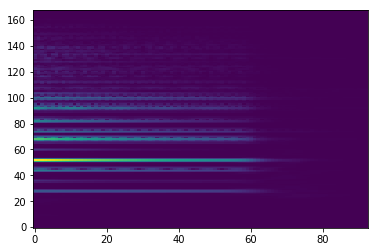

In [8]:
plt.imshow(spec[0], aspect='auto', origin='lower')

In [9]:
spec[0]

tensor([[ 911.6144,  858.6310,  794.0670,  ...,   24.3373,   23.3899,
           22.6981],
        [3044.7068, 2784.4961, 2493.8989,  ...,   31.8460,   35.0234,
           38.4133],
        [9442.3115, 8685.4521, 8036.7739,  ...,   93.0657,   89.2090,
           85.6012],
        ...,
        [3846.7888, 2630.9890, 2913.7498,  ...,  185.8119,  443.9184,
          203.0666],
        [7780.5020, 7641.1479, 7737.0322,  ...,  313.4372,  278.4749,
          339.0150],
        [3133.0225, 3950.0520, 3446.5674,  ...,   90.7531,  298.7794,
          391.9747]])